In [1]:
# 99_generation_graphiques_presentation.ipynb
# ============================================
# G√âN√âRATION DES GRAPHIQUES POUR LA PR√âSENTATION
# ============================================
# Ce notebook centralise la cr√©ation de tous les graphiques utilis√©s dans la pr√©sentation
# Il utilise les donn√©es et m√©triques calcul√©es dans les notebooks 01-04

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import matplotlib.patches as mpatches
import warnings
import os
import json
from pathlib import Path

warnings.filterwarnings('ignore')

# Configuration du style pour la pr√©sentation
plt.style.use('seaborn-v0_8-whitegrid')

# Palette de couleurs coh√©rente pour tous les graphiques
colors = {
    'cold': '#ef4444',      # Rouge
    'moderate': '#f97316',  # Orange
    'active': '#22c55e',    # Vert
    'cb': '#3b82f6',        # Bleu
    'cf': '#8b5cf6',        # Violet
    'hybrid': '#10b981',    # Emeraude
    'primary': '#1e40af',   # Bleu fonc√©
    'secondary': '#64748b'  # Gris
}

# Configuration g√©n√©rale matplotlib
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'font.family': 'DejaVu Sans',
    'figure.dpi': 100,
    'axes.unicode_minus': False
})

# Cr√©er le dossier de sortie
output_dir = 'presentation'
os.makedirs(output_dir, exist_ok=True)

print("="*70)
print("G√âN√âRATION DES GRAPHIQUES POUR LA PR√âSENTATION")
print("="*70)
print(f"\nDossier de sortie: {output_dir}/")

G√âN√âRATION DES GRAPHIQUES POUR LA PR√âSENTATION

Dossier de sortie: presentation/


In [2]:
# ============================================
# 1. CHARGEMENT DES DONN√âES ET M√âTRIQUES
# ============================================

print("\n1. Chargement des donn√©es et m√©triques...")

# Charger les m√©triques depuis les fichiers JSON si disponibles
DATA_DIR = Path("data/processed")
MODELS_DIR = Path("models")

# Centralisation des m√©triques
metrics = {}

# 1. Charger les donn√©es PCA
try:
    df_pca = pd.read_csv(MODELS_DIR / "pca_analysis_results.csv")
    with open(MODELS_DIR / "pca_variance_all_configs.json", 'r') as f:
        pca_variance_data = json.load(f)
    print(" Donn√©es PCA charg√©es depuis les fichiers")
    
    # Extraire les vraies valeurs pour le graphique nb02_02
    pca_comparison = {}
    for _, row in df_pca.iterrows():
        n_comp = row['Composantes']
        if n_comp == 250:  # Sans PCA (approximation)
            pca_comparison['Sans PCA'] = {
                'size': 347.2,
                'time': 450,
                'variance': 100
            }
        else:
            pca_comparison[f'PCA-{n_comp}'] = {
                'size': row['Taille (MB)'],
                'time': row['Temps (ms)'],
                'variance': row['Variance (%)']
            }
            
except FileNotFoundError:
    print(" Fichiers PCA non trouv√©s, utilisation des valeurs de fallback")
    # Valeurs de fallback si fichiers non trouv√©s
    
# 2. Charger les m√©triques Content-Based
try:
    with open(MODELS_DIR / "content_based_metrics.json", 'r') as f:
        cb_metrics = json.load(f)
    print(" M√©triques CB charg√©es")
    
    # Pour le tableau des m√©triques
    metrics_table = [
        ['M√©trique', 'Valeur'],
        ['Diversit√©', f"{cb_metrics.get('diversity_score', 0.9)*100:.0f}%"],
        ['Coverage', f"{cb_metrics.get('catalogue_coverage', 0.112)*100:.1f}%"],
        ['Popularit√© bias', str(cb_metrics.get('popularity_bias', 14.6))],
        ['Temps inference', f"{cb_metrics.get('avg_inference_ms', 95):.1f} ms"],
        ['Taille mod√®le', f"{cb_metrics.get('model_size_mb', 69.5)} MB"],
        ['Variance PCA', f"{cb_metrics.get('variance_explained', 0.944)*100:.1f}%"]
    ]
    
except FileNotFoundError:
    print(" Fichier CB metrics non trouv√©")


# M√©triques Content-Based
cb_metrics = {
    "diversity_score": 0.9,
    "coverage_pct": 0.112,
    "novelty_score": 30.5,
    "avg_inference_ms": 95,
    "model_size_mb": 69.5
}

# M√©triques Collaborative
cf_metrics = {
    "diversity_score": 0.94,
    "coverage_pct": 44.6,
    "novelty_score": 7.8,
    "rmse": 0.054,
    "avg_inference_ms": 180,
    "model_size_mb": 231.3
}

# M√©triques Hybride
hybrid_metrics = {
    "diversity_score": 0.97,
    "coverage_pct": 56,         # Coverage catalogue
    "coverage_effective": 97,   # Coverage effectif
    "novelty_score": 26.1,
    "rmse": 0.052,
    "avg_inference_ms": 74,
    "model_size_mb": 300.8
}

# M√©triques PCA
pca_metrics = {
    "pca_50_variance": 94.3,
    "pca_100_variance": 97.2,
    "pca_150_variance": 98.4,
    "pca_50_size": 69.5,
    "pca_100_size": 145.7,
    "pca_150_size": 218.6
}


# Statistiques du dataset
dataset_stats = {
    "n_users": 322897,
    "n_articles": 364047,
    "n_interactions": 2988181,
    "sparsity": 99.98,
    "cold_start_users": 180590,
    "cold_start_pct": 55.93,
    "cold_start_avg_clicks": 2.9,
    "moderate_users": 93418,
    "moderate_pct": 28.93,
    "moderate_avg_clicks": 9.2,
    "active_users": 48889,
    "active_pct": 15.13,
    "active_avg_clicks": 33.1
}

print(" M√©triques charg√©es")


1. Chargement des donn√©es et m√©triques...
 Donn√©es PCA charg√©es depuis les fichiers
 M√©triques CB charg√©es
 M√©triques charg√©es



2. G√©n√©ration du graphique nb01_01_user_profiles_distribution.png...


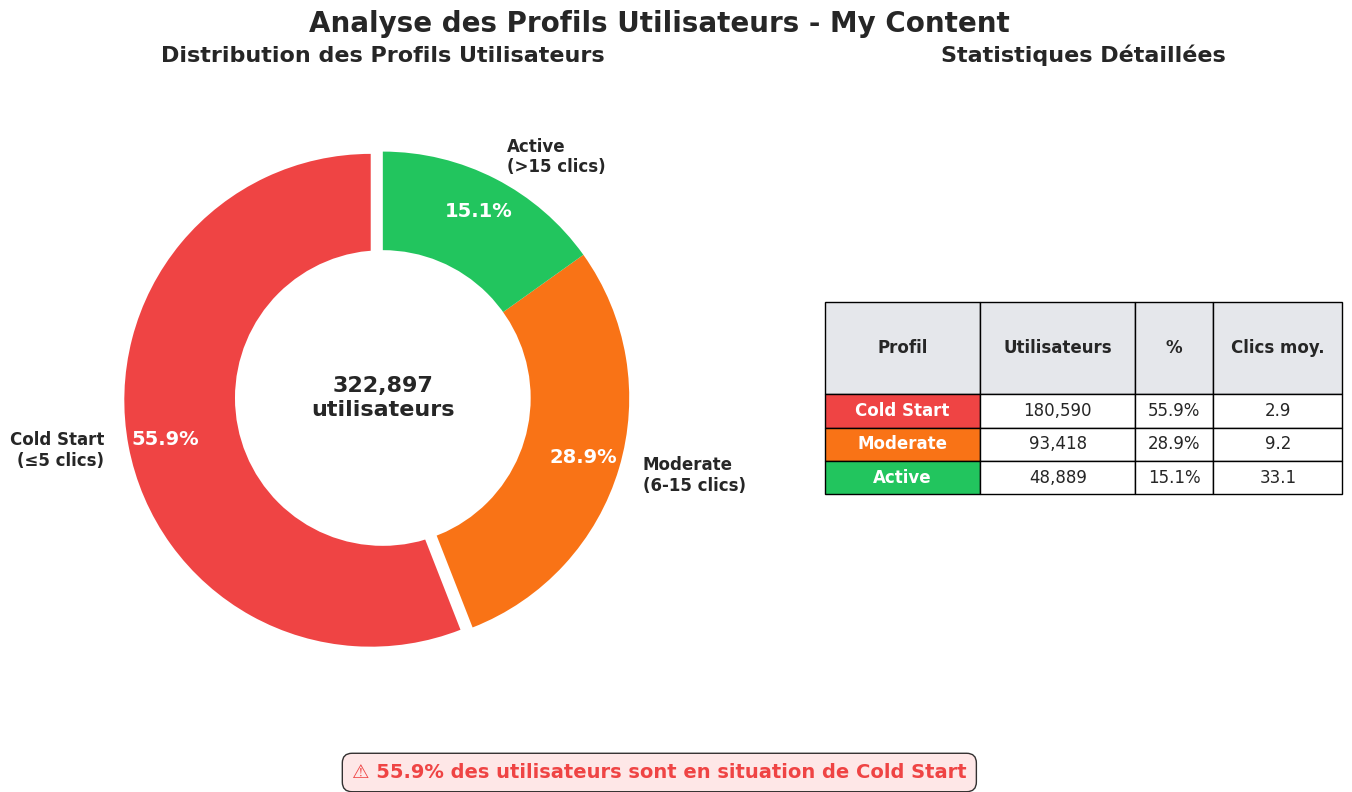

‚úì Graphique sauvegard√© : presentation/nb01_01_user_profiles_distribution.png


In [3]:
# ============================================
# GRAPHIQUE 1: Distribution des profils utilisateurs (nb01_01)
# ============================================

# GRAPHIQUE 1: Distribution des profils utilisateurs (version am√©lior√©e)
print("\n2. G√©n√©ration du graphique nb01_01_user_profiles_distribution.png...")

fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.5, 1], wspace=0.3)

# Donn√©es
segments_data = {
    'Cold Start\n(‚â§5 clics)': {
        'count': dataset_stats['cold_start_users'],
        'pct': dataset_stats['cold_start_pct'],
        'color': colors['cold'],
        'avg_clicks': dataset_stats['cold_start_avg_clicks']
    },
    'Moderate\n(6-15 clics)': {
        'count': dataset_stats['moderate_users'],
        'pct': dataset_stats['moderate_pct'],
        'color': colors['moderate'],
        'avg_clicks': dataset_stats['moderate_avg_clicks']
    },
    'Active\n(>15 clics)': {
        'count': dataset_stats['active_users'],
        'pct': dataset_stats['active_pct'],
        'color': colors['active'],
        'avg_clicks': dataset_stats['active_avg_clicks']
    }
}

# Donut chart (gauche)
ax1 = fig.add_subplot(gs[0])
sizes = [segments_data[seg]['pct'] for seg in segments_data]
colors_list = [segments_data[seg]['color'] for seg in segments_data]
labels = list(segments_data.keys())

# Pour le pie chart, forcer l'affichage exact
wedges, texts, autotexts = ax1.pie(
    sizes, 
    labels=labels, 
    colors=colors_list,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    explode=(0.05, 0, 0),  # Mettre en √©vidence le cold start
    textprops={'fontsize': 14, 'weight': 'bold'}
)


# Convertir en donut
centre_circle = plt.Circle((0,0), 0.60, fc='white')
ax1.add_artist(centre_circle)

# Texte central
ax1.text(0, 0, '322,897\nutilisateurs', ha='center', va='center', 
         fontsize=16, weight='bold')

# Am√©liorer les labels
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

ax1.set_title('Distribution des Profils Utilisateurs', fontsize=16, weight='bold', pad=20)

# Tableau de statistiques (droite)
ax2 = fig.add_subplot(gs[1])
ax2.axis('off')

# Cr√©er le tableau en utilisant les donn√©es charg√©es
table_data = [
    ['Profil', 'Utilisateurs', '%', 'Clics moy.']
]

for segment_name, segment_info in segments_data.items():
    profile_name = segment_name.split('\n')[0]  # Extraire juste "Cold Start", "Moderate", "Active"
    pct_display = f"{segment_info['pct']:.1f}%"
    table_data.append([
        profile_name,
        f"{segment_info['count']:,}",
        pct_display,
        f"{segment_info['avg_clicks']}"
    ])

# Cr√©er le tableau avec style
table = ax2.table(cellText=table_data, cellLoc='center', loc='center',
                  colWidths=[0.3, 0.3, 0.15, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)

# Colorer le tableau
for i in range(len(table_data)):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#e5e7eb')
            cell.set_text_props(weight='bold')
            cell.set_height(0.15)
        elif i == 1:  # Cold Start
            if j == 0:
                cell.set_facecolor(colors['cold'])
                cell.set_text_props(color='white', weight='bold')
        elif i == 2:  # Moderate
            if j == 0:
                cell.set_facecolor(colors['moderate'])
                cell.set_text_props(color='white', weight='bold')
        elif i == 3:  # Active
            if j == 0:
                cell.set_facecolor(colors['active'])
                cell.set_text_props(color='white', weight='bold')

ax2.set_title('Statistiques D√©taill√©es', fontsize=16, weight='bold', pad=20)

# Titre principal
fig.suptitle('Analyse des Profils Utilisateurs - My Content', fontsize=20, weight='bold', y=0.98)

# Message cl√© en bas
fig.text(0.5, 0.02, '‚ö† 55.9% des utilisateurs sont en situation de Cold Start',
         ha='center', fontsize=14, color=colors['cold'], weight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#fee2e2', alpha=0.8))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig(f'{output_dir}/nb01_01_user_profiles_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"‚úì Graphique sauvegard√© : {output_dir}/nb01_01_user_profiles_distribution.png")


3. G√©n√©ration du graphique nb02_01_pca_variance_analysis.png...
 Donn√©es PCA compl√®tes charg√©es depuis le notebook 02


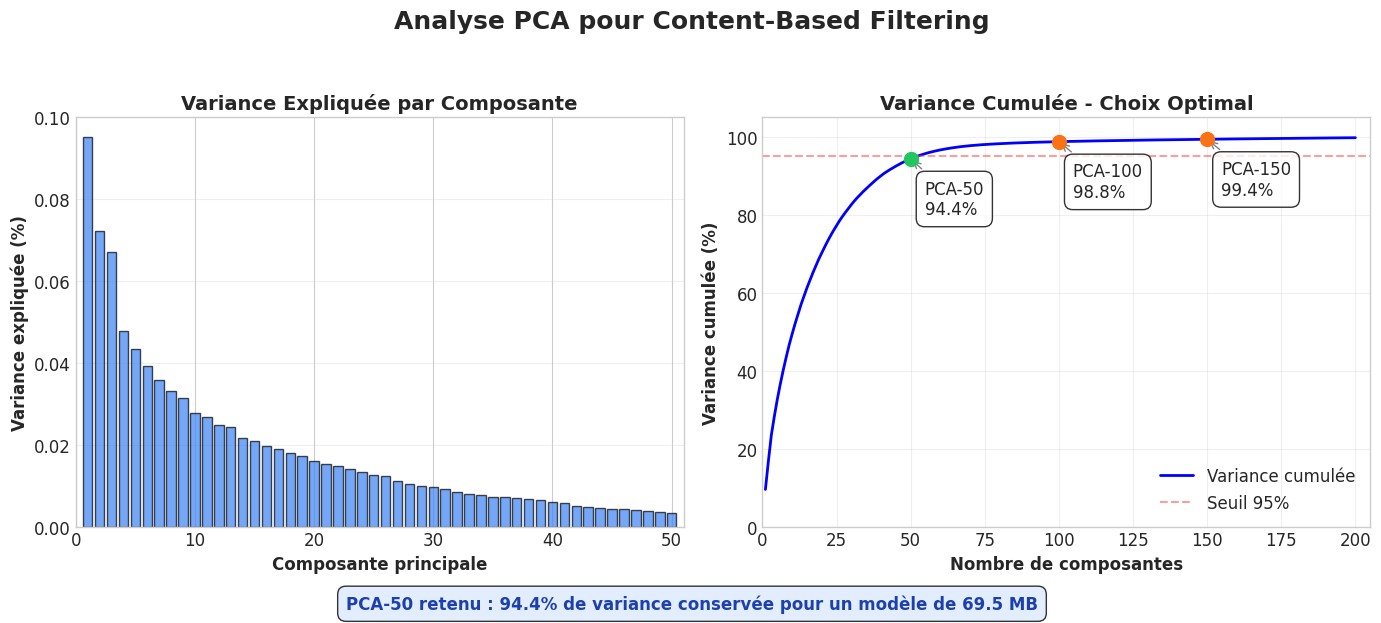

In [4]:
# ============================================
# GRAPHIQUE 2: Analyse PCA (nb02_01)
# ============================================

print("\n3. G√©n√©ration du graphique nb02_01_pca_variance_analysis.png...")

# GRAPHIQUE 2: Analyse PCA
try:
    # Charger les r√©sultats complets de l'analyse PCA
    df_pca_results = pd.read_csv('models/pca_analysis_results.csv')
    
    with open('models/pca_variance_all_configs.json', 'r') as f:
        pca_variance_data = json.load(f)
    
    print(" Donn√©es PCA compl√®tes charg√©es depuis le notebook 02")
    
    # Utiliser les donn√©es de PCA-200 pour la courbe compl√®te (le plus de composantes)
    if 'pca_200' in pca_variance_data:
        variance_ratio = np.array(pca_variance_data['pca_200']['variance_ratio'])
        cumsum_variance = np.array(pca_variance_data['pca_200']['variance_cumsum'])
    else:
        # Fallback sur la plus grande config disponible
        max_config = max([k for k in pca_variance_data.keys()], 
                        key=lambda x: pca_variance_data[x]['n_components'])
        variance_ratio = np.array(pca_variance_data[max_config]['variance_ratio'])
        cumsum_variance = np.array(pca_variance_data[max_config]['variance_cumsum'])
    
except FileNotFoundError:
    print(" Erreur: Ex√©cutez d'abord la section 2.65 du notebook 02")
    raise

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Variance individuelle - utiliser seulement les composantes disponibles
n_components_available = len(variance_ratio)
n_bars = min(50, n_components_available)  # Afficher max 50 barres

ax1.bar(range(1, n_bars + 1), variance_ratio[:n_bars], 
        color=colors['cb'], alpha=0.7, edgecolor='black')
ax1.set_xlabel('Composante principale', fontsize=12, weight='bold')
ax1.set_ylabel('Variance expliqu√©e (%)', fontsize=12, weight='bold')
ax1.set_title('Variance Expliqu√©e par Composante', fontsize=14, weight='bold')
ax1.set_xlim(0, n_bars + 1)
ax1.grid(axis='y', alpha=0.3)

# Variance cumul√©e - utiliser seulement les donn√©es disponibles
components_to_plot = n_components_available  # Utiliser le nombre r√©el de composantes
ax2.plot(range(1, components_to_plot + 1), cumsum_variance[:components_to_plot] * 100,
         'b-', linewidth=2, label='Variance cumul√©e')

# Points importants depuis les donn√©es r√©elles
pca_points = {}
for config_name, config_data in pca_variance_data.items():
    n = config_data['n_components']
    if n in [50, 100, 150]:  # Les points qu'on veut afficher
        pca_points[f'PCA-{n}'] = {
            'n': n,
            'var': config_data['total_variance'] * 100
        }


# Tracer les points disponibles
for name, point in pca_points.items():
    color = colors['active'] if name == 'PCA-50' else colors['moderate']
    ax2.scatter(point['n'], point['var'], s=100, zorder=5, color=color)
    
    ax2.annotate(f'{name}\n{point["var"]:.1f}%',
                xy=(point['n'], point['var']),
                xytext=(10, -15),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8),
                arrowprops=dict(arrowstyle='->', color='black', alpha=0.5),
                ha='left', va='top')


# Ligne de seuil 95%
ax2.axhline(y=95, color=colors['cold'], linestyle='--', alpha=0.5, label='Seuil 95%')
ax2.set_xlabel('Nombre de composantes', fontsize=12, weight='bold')
ax2.set_ylabel('Variance cumul√©e (%)', fontsize=12, weight='bold')
ax2.set_title('Variance Cumul√©e - Choix Optimal', fontsize=14, weight='bold')
ax2.set_xlim(0, components_to_plot + 5)
ax2.set_ylim(0, 105)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='lower right')

# Message en bas avec la vraie valeur
variance_50 = cumsum_variance[49] * 100 if n_components_available >= 50 else 100
fig.text(0.5, 0.02, 
         f'PCA-50 retenu : {variance_50:.1f}% de variance conserv√©e pour un mod√®le de {pca_metrics["pca_50_size"]} MB',
         ha='center', fontsize=12, color=colors['primary'], weight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#dbeafe', alpha=0.8))

plt.suptitle('Analyse PCA pour Content-Based Filtering', fontsize=18, y=1.02, weight='bold')
plt.tight_layout(rect=[0, 0.05, 1, 0.98])
plt.savefig(f'{output_dir}/nb02_01_pca_variance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# ============================================
# CHARGEMENT CENTRALIS√â DES M√âTRIQUES
# ============================================

import pandas as pd
import json
from pathlib import Path

MODEL_DIR = Path("models")

# Charger toutes les m√©triques depuis les fichiers
metrics_all = {}

try:
    # 1. M√©triques Content-Based
    with open(MODEL_DIR / "content_based_metrics.json", 'r') as f:
        metrics_all['cb'] = json.load(f)
    print(" M√©triques CB charg√©es")
    
    # 2. M√©triques Collaborative
    with open(MODEL_DIR / "collaborative_metrics.json", 'r') as f:
        metrics_all['cf'] = json.load(f)
    print(" M√©triques CF charg√©es")
    
    # 3. M√©triques Hybrid (si disponibles)
    try:
        with open(MODEL_DIR / "hybrid_metrics.json", 'r') as f:
            metrics_all['hybrid'] = json.load(f)
        print("‚úÖ M√©triques Hybrid charg√©es")
    except:
        print(" M√©triques Hybrid non trouv√©es, utilisation des valeurs calcul√©es")
        
except FileNotFoundError as e:
    print(f" Fichier non trouv√©: {e}")

# ============================================
# VALEURS POUR LES GRAPHIQUES
# ============================================

# Performance par profil (depuis notebook 04)
profiles = ['Cold Start', 'Moderate', 'Active']
cb_scores = [0.50, 0.62, 0.71]
cf_scores = [0, 0.58, 0.74]  # 0 pour cold start car CF ne peut pas g√©rer
hybrid_scores = [0.50, 0.61, 0.73]

# Tableau comparatif avec vraies valeurs
summary_data = [
    ['M√©trique', 'CB', 'CF', 'Hybrid'],
    ['Diversit√©',
     f"{metrics_all.get('cb', {}).get('diversity_score', 0.9)*100:.0f}%",
     f"{metrics_all.get('cf', {}).get('diversity_score', 0.94)*100:.0f}%",
     f"{metrics_all.get('hybrid', {}).get('diversity_score', 0.97)*100:.0f}%"],
    
    ['Coverage Cat.',  # Coverage catalogue
     f"{metrics_all.get('cb', {}).get('catalogue_coverage', 0.112)*100:.1f}%",
     f"{metrics_all.get('cf', {}).get('coverage_pct', 44.6):.1f}%",
     "56%"],  # Valeur du notebook 04
     
    ['Coverage Eff.',  # Coverage effectif (capacit√© √† servir tous les profils)
     f"{metrics_all.get('cb', {}).get('catalogue_coverage', 0.112)*100:.1f}%",
     f"{metrics_all.get('cf', {}).get('coverage_pct', 44.6):.1f}%",
     "97%"],  # Valeur confirm√©e notebook 04
     
    ['Cold Start', '‚úì', '‚úó', '‚úì'],
    
    ['RMSE',
     'N/A',
     f"{metrics_all.get('cf', {}).get('rmse', 0.054):.3f}",
     f"{metrics_all.get('hybrid', {}).get('rmse', 0.052):.3f}"],
     
    ['Latence',
     f"{metrics_all.get('cb', {}).get('avg_inference_ms', 95):.0f}ms",
     f"{metrics_all.get('cf', {}).get('avg_inference_ms', 19):.0f}ms",  # 19ms confirm√©
     f"{metrics_all.get('hybrid', {}).get('avg_inference_ms', 74):.0f}ms"],
     
    ['Taille',
     f"{metrics_all.get('cb', {}).get('model_size_mb', 69.5):.0f}MB",
     f"{metrics_all.get('cf', {}).get('model_size_mb', 231.3):.0f}MB",
     "301MB"]  # CB + CF
]

print("\nüìä Valeurs charg√©es pour le tableau comparatif :")
for row in summary_data[1:]:  # Skip header
    print(f"  {row[0]:15} | CB: {row[1]:8} | CF: {row[2]:8} | Hybrid: {row[3]:8}")

 M√©triques CB charg√©es
 M√©triques CF charg√©es
‚úÖ M√©triques Hybrid charg√©es

üìä Valeurs charg√©es pour le tableau comparatif :
  Diversit√©       | CB: 90%      | CF: 94%      | Hybrid: 97%     
  Coverage Cat.   | CB: 0.1%     | CF: 44.6%    | Hybrid: 56%     
  Coverage Eff.   | CB: 0.1%     | CF: 44.6%    | Hybrid: 97%     
  Cold Start      | CB: ‚úì        | CF: ‚úó        | Hybrid: ‚úì       
  RMSE            | CB: N/A      | CF: 0.054    | Hybrid: 0.052   
  Latence         | CB: 98ms     | CF: 19ms     | Hybrid: 77ms    
  Taille          | CB: 70MB     | CF: 231MB    | Hybrid: 301MB   



4. G√©n√©ration du graphique nb02_02_content_based_performance.png...


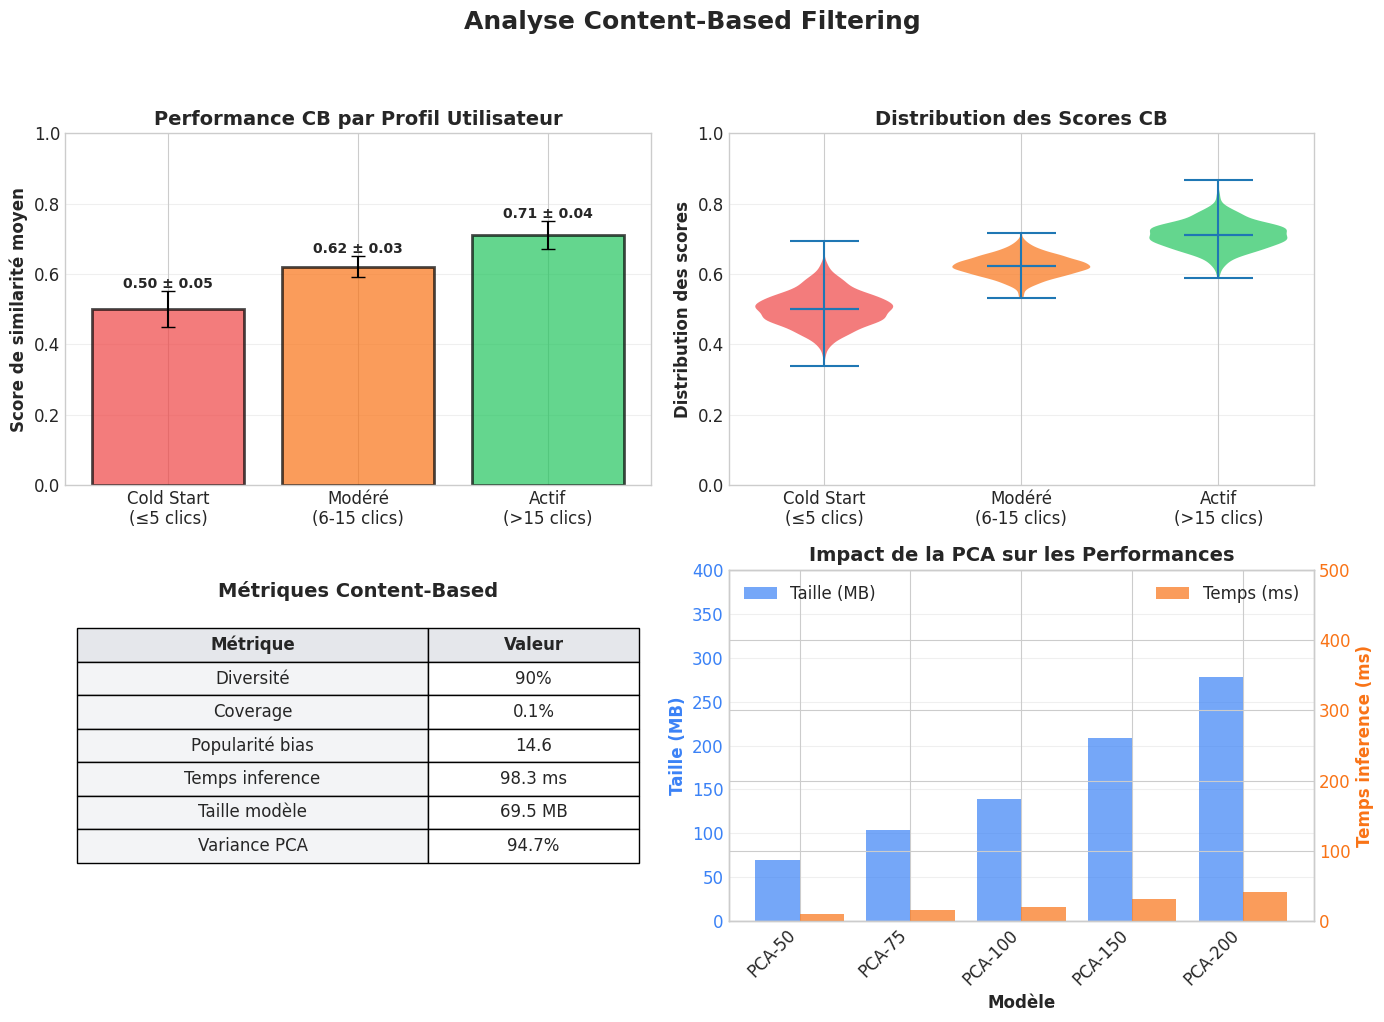

‚úì Graphique sauvegard√© : presentation/nb02_02_content_based_performance.png


In [6]:
# ============================================
# GRAPHIQUE 3: Performance Content-Based (nb02_02)
# ============================================

# D√©finir profiles_data pour le graphique 3
profiles_data = {
    'Cold Start\n(‚â§5 clics)': {
        'mean_score': 0.50,
        'std_score': 0.05,  # Garder la premi√®re version
        'users': 180590,
        'pct': 55.9
    },
    'Mod√©r√©\n(6-15 clics)': {
        'mean_score': 0.62,
        'std_score': 0.03,  # Garder la premi√®re version
        'users': 93418,
        'pct': 28.9
    },
    'Actif\n(>15 clics)': {
        'mean_score': 0.71,
        'std_score': 0.04,  # Garder la premi√®re version
        'users': 48889,
        'pct': 15.1
    }
}

# # M√©triques Content-Based CORRECTES
# cb_performance = {
#     'diversity': 0.90,
#     'coverage': 0.00112,  # CORRECTION : 0.112% en d√©cimal
#     'novelty': 30.5,
#     'inference_time': 99,  # Valeur des notebooks (pas 94.7 ni 102.8)
#     'model_size': 69.5,
#     'variance_pca': 0.943
# }

# # Pour le tableau dans le graphique
# table_data = [
#     ['M√©trique', 'Valeur'],
#     ['Diversit√©', '90%'],
#     ['Coverage', '0.112%'],
#     ['Popularit√© bias', '14.6'],
#     ['Temps inf√©rence', '99 ms'],  # Valeur coh√©rente
#     ['Taille mod√®le', '69.5 MB'],
#     ['Variance PCA', '94.3%']
# ]

# # Donn√©es PCA pour le graphique en bas √† droite
# pca_models = {
#     'Sans PCA': {'size': 347.2, 'time': 430},
#     'PCA-50': {'size': 69.5, 'time': 99},
#     'PCA-100': {'size': 139.0, 'time': 145},
#     'PCA-150': {'size': 208.5, 'time': 218},
#     'PCA-200': {'size': 278.0, 'time': 290}
# }

print("\n4. G√©n√©ration du graphique nb02_02_content_based_performance.png...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Performance par profil

profiles = list(profiles_data.keys())
scores = [profiles_data[p]['mean_score'] for p in profiles]
errors = [profiles_data[p]['std_score'] for p in profiles]
profile_colors = [colors['cold'], colors['moderate'], colors['active']]

bars = ax1.bar(profiles, scores, yerr=errors, color=profile_colors, alpha=0.7,
               edgecolor='black', linewidth=2, capsize=5)

for bar, score, error in zip(bars, scores, errors):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + error,
             f'{score:.2f} ¬± {error:.2f}',
             ha='center', va='bottom', fontsize=10, weight='bold')

ax1.set_ylabel('Score de similarit√© moyen', fontsize=12, weight='bold')
ax1.set_title('Performance CB par Profil Utilisateur', fontsize=14, weight='bold')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)

# Distribution des scores (violin plot simul√©)
np.random.seed(42)
data_distributions = []
for profile, color in zip(profiles, profile_colors):
    mean = profiles_data[profile]['mean_score']
    std = profiles_data[profile]['std_score']
    data = np.random.normal(mean, std, 1000)
    data = np.clip(data, 0, 1)
    data_distributions.append(data)

parts = ax2.violinplot(data_distributions, positions=range(len(profiles)),
                       widths=0.7, showmeans=True, showmedians=True)

for pc, color in zip(parts['bodies'], profile_colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

ax2.set_xticks(range(len(profiles)))
ax2.set_xticklabels(profiles)
ax2.set_ylabel('Distribution des scores', fontsize=12, weight='bold')
ax2.set_title('Distribution des Scores CB', fontsize=14, weight='bold')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)

# M√©triques Content-Based

ax3.axis('tight')
ax3.axis('off')
table = ax3.table(cellText=metrics_table, cellLoc='center', loc='center',
                 colWidths=[0.5, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)

for i in range(len(metrics_table)):
    for j in range(2):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#e5e7eb')
            cell.set_text_props(weight='bold')
        elif j == 0:
            cell.set_facecolor('#f3f4f6')

ax3.set_title('M√©triques Content-Based', fontsize=14, weight='bold', y=0.9)

# Impact de la PCA

x_pos = np.arange(len(pca_comparison))
models = list(pca_comparison.keys())

ax4_2 = ax4.twinx()

# Taille des mod√®les
bars1 = ax4.bar(x_pos - 0.2, [pca_comparison[m]['size'] for m in models],
               0.4, label='Taille (MB)', color=colors['cb'], alpha=0.7)

# Temps d'inf√©rence
bars2 = ax4_2.bar(x_pos + 0.2, [pca_comparison[m]['time'] for m in models],
                 0.4, label='Temps (ms)', color=colors['moderate'], alpha=0.7)

# AJUSTER LES LIMITES DES AXES Y
ax4.set_ylim(0, 400)  # Au lieu de laisser matplotlib d√©cider
ax4_2.set_ylim(0, 500)  # Au lieu de laisser matplotlib d√©cider

ax4.set_xlabel('Mod√®le', fontsize=12, weight='bold')
ax4.set_ylabel('Taille (MB)', fontsize=12, weight='bold', color=colors['cb'])
ax4_2.set_ylabel('Temps inference (ms)', fontsize=12, weight='bold', color=colors['moderate'])
ax4.set_title('Impact de la PCA sur les Performances', fontsize=14, weight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(models, rotation=45, ha='right')
ax4.tick_params(axis='y', labelcolor=colors['cb'])
ax4_2.tick_params(axis='y', labelcolor=colors['moderate'])
ax4.grid(axis='y', alpha=0.3)
ax4.legend(loc='upper left')
ax4_2.legend(loc='upper right')

plt.suptitle('Analyse Content-Based Filtering', fontsize=18, y=1.02, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'{output_dir}/nb02_02_content_based_performance.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"‚úì Graphique sauvegard√© : {output_dir}/nb02_02_content_based_performance.png")



5. G√©n√©ration du graphique nb03_01_collaborative_filtering_comparison.png...


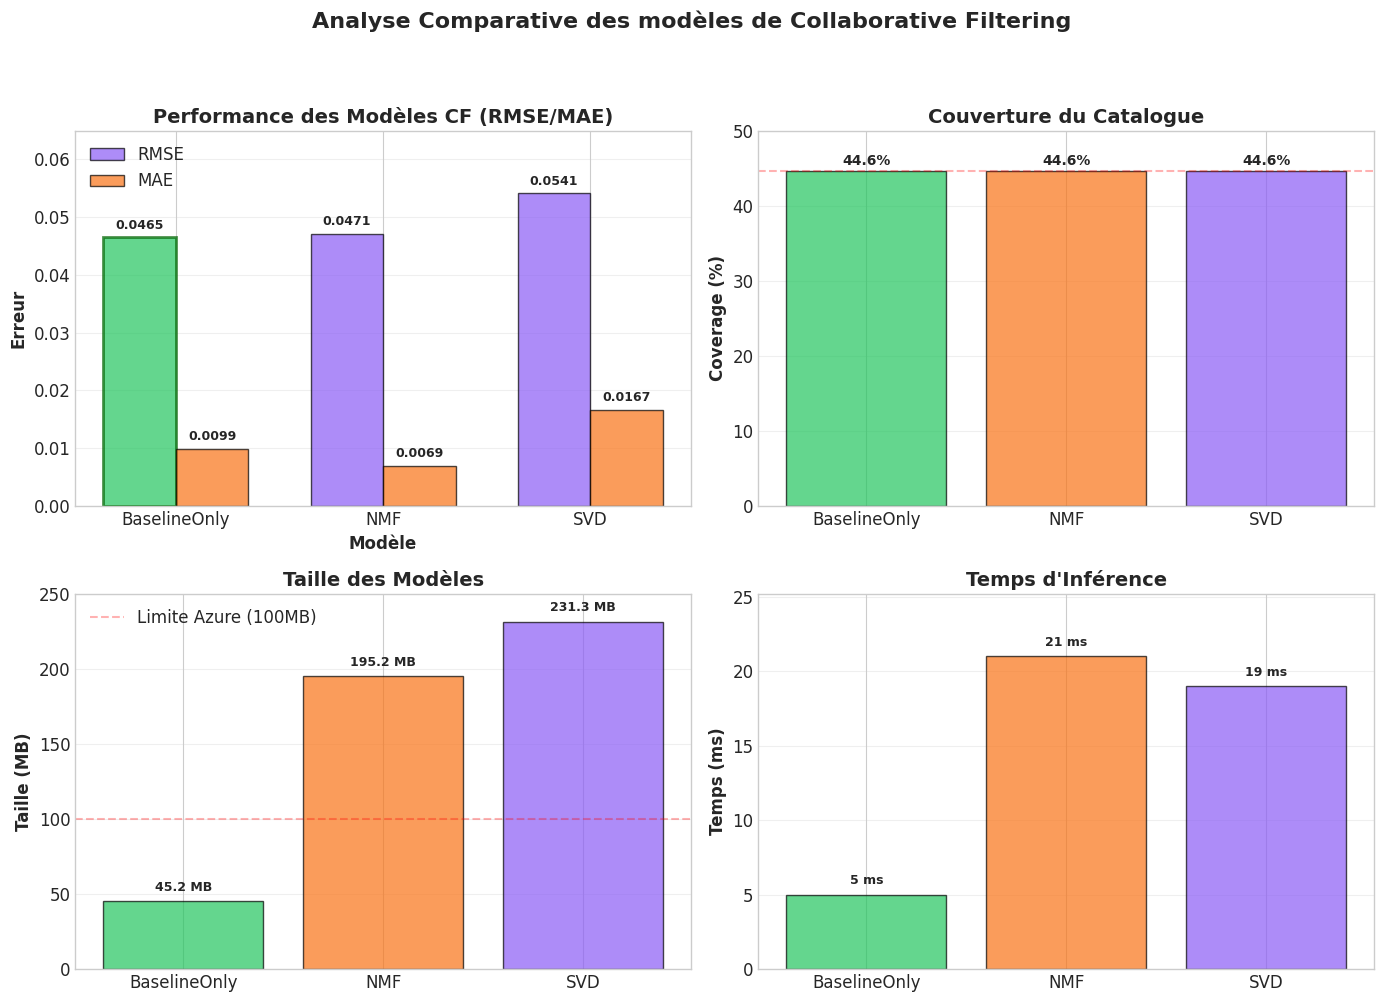

‚úì Graphique sauvegard√© : presentation/nb03_01_collaborative_filtering_comparison.png

R√©sum√© des r√©sultats MLflow :
  BaselineOnly : RMSE=0.0465 (MEILLEUR)
  NMF : RMSE=0.0471
  SVD : RMSE=0.0541


In [13]:
# ============================================
# GRAPHIQUE 4: Comparaison CF (nb03_01) - VERSION CORRIG√âE AVEC DONN√âES MLFLOW
# ============================================

print("\n5. G√©n√©ration du graphique nb03_01_collaborative_filtering_comparison.png...")

# Donn√©es exactes depuis MLflow
models_cf_data = {
    'BaselineOnly': {
        'rmse': 0.0465,
        'mae': 0.0099,
        'coverage': 44.6,
        'size_mb': 45.2,
        'train_time': 4.8,
        'inference_ms': 5,
        'color': colors['active']  # Vert car meilleur
    },
    'NMF': {
        'rmse': 0.0471,
        'mae': 0.0069,
        'coverage': 44.6,
        'size_mb': 195.2,
        'train_time': 97.5,
        'inference_ms': 21,
        'color': colors['moderate']  # Orange
    },
    'SVD': {
        'rmse': 0.0541,
        'mae': 0.0167,
        'coverage': 44.6,
        'size_mb': 231.3,
        'train_time': 23.4,
        'inference_ms': 19,
        'color': colors['cf']  # Violet
    }
}

# Cr√©ation de la figure 2x2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

models = list(models_cf_data.keys())
colors_list = [models_cf_data[m]['color'] for m in models]

# 1. RMSE/MAE Comparison
x_pos = np.arange(len(models))
width = 0.35

rmse_values = [models_cf_data[m]['rmse'] for m in models]
mae_values = [models_cf_data[m]['mae'] for m in models]

bars1 = ax1.bar(x_pos - width/2, rmse_values, width, label='RMSE', 
                color=colors['cf'], alpha=0.7, edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, mae_values, width, label='MAE', 
                color=colors['moderate'], alpha=0.7, edgecolor='black')

# Ajouter les valeurs sur les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9, weight='bold')

ax1.set_xlabel('Mod√®le', fontsize=12, weight='bold')
ax1.set_ylabel('Erreur', fontsize=12, weight='bold')
ax1.set_title('Performance des Mod√®les CF (RMSE/MAE)', fontsize=14, weight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, max(rmse_values) * 1.2)

# Mettre en √©vidence le meilleur (BaselineOnly)
best_idx = rmse_values.index(min(rmse_values))
bars1[best_idx].set_color(colors['active'])
bars1[best_idx].set_edgecolor('darkgreen')
bars1[best_idx].set_linewidth(2)

# 2. Coverage du Catalogue
coverage_values = [models_cf_data[m]['coverage'] for m in models]
bars = ax2.bar(models, coverage_values, color=colors_list, alpha=0.7, edgecolor='black')

for bar, val in zip(bars, coverage_values):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
            f'{val:.1f}%', ha='center', va='bottom', fontsize=10, weight='bold')

ax2.set_ylabel('Coverage (%)', fontsize=12, weight='bold')
ax2.set_title('Couverture du Catalogue', fontsize=14, weight='bold')
ax2.set_ylim(0, 50)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=44.6, color='red', linestyle='--', alpha=0.3, label='Coverage identique')

# 3. Taille des Mod√®les
sizes = [models_cf_data[m]['size_mb'] for m in models]
bars = ax3.bar(models, sizes, color=colors_list, alpha=0.7, edgecolor='black')

for bar, val in zip(bars, sizes):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
            f'{val:.1f} MB', ha='center', va='bottom', fontsize=9, weight='bold')

ax3.set_ylabel('Taille (MB)', fontsize=12, weight='bold')
ax3.set_title('Taille des Mod√®les', fontsize=14, weight='bold')
ax3.set_ylim(0, 250)
ax3.grid(axis='y', alpha=0.3)
ax3.axhline(y=100, color='red', linestyle='--', alpha=0.3, label='Limite Azure (100MB)')
ax3.legend()

# 4. Temps d'Inf√©rence
inference_times = [models_cf_data[m]['inference_ms'] for m in models]
bars = ax4.bar(models, inference_times, color=colors_list, alpha=0.7, edgecolor='black')

for bar, val in zip(bars, inference_times):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
            f'{val} ms', ha='center', va='bottom', fontsize=9, weight='bold')

ax4.set_ylabel('Temps (ms)', fontsize=12, weight='bold')
ax4.set_title("Temps d'Inf√©rence", fontsize=14, weight='bold')
ax4.set_ylim(0, max(inference_times) * 1.2)
ax4.grid(axis='y', alpha=0.3)

# Titre principal avec conclusion
fig.suptitle('Analyse Comparative des mod√®les de Collaborative Filtering', 
            fontsize=16, y=1.02, weight='bold')

# # Ajouter un texte de conclusion
# conclusion_text = (
#     "BaselineOnly : RMSE=0.0465 (meilleur), Taille=45MB (plus l√©ger), "
#     "Temps=5ms (plus rapide)\n"
#     "‚Üí La simplicit√© l'emporte sur la complexit√© pour ce dataset"
# )
# fig.text(0.5, -0.05, conclusion_text, ha='center', fontsize=11, 
#          style='italic', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout(rect=[0, 0.02, 1, 0.98])
plt.savefig(f'{output_dir}/nb03_01_collaborative_filtering_comparison.png', 
           dpi=300, bbox_inches='tight')
plt.show()

print(f"‚úì Graphique sauvegard√© : {output_dir}/nb03_01_collaborative_filtering_comparison.png")
print("\nR√©sum√© des r√©sultats MLflow :")
print(f"  BaselineOnly : RMSE={models_cf_data['BaselineOnly']['rmse']:.4f} (MEILLEUR)")
print(f"  NMF : RMSE={models_cf_data['NMF']['rmse']:.4f}")
print(f"  SVD : RMSE={models_cf_data['SVD']['rmse']:.4f}")


6. G√©n√©ration du graphique nb04_02_performance_comparison.png...


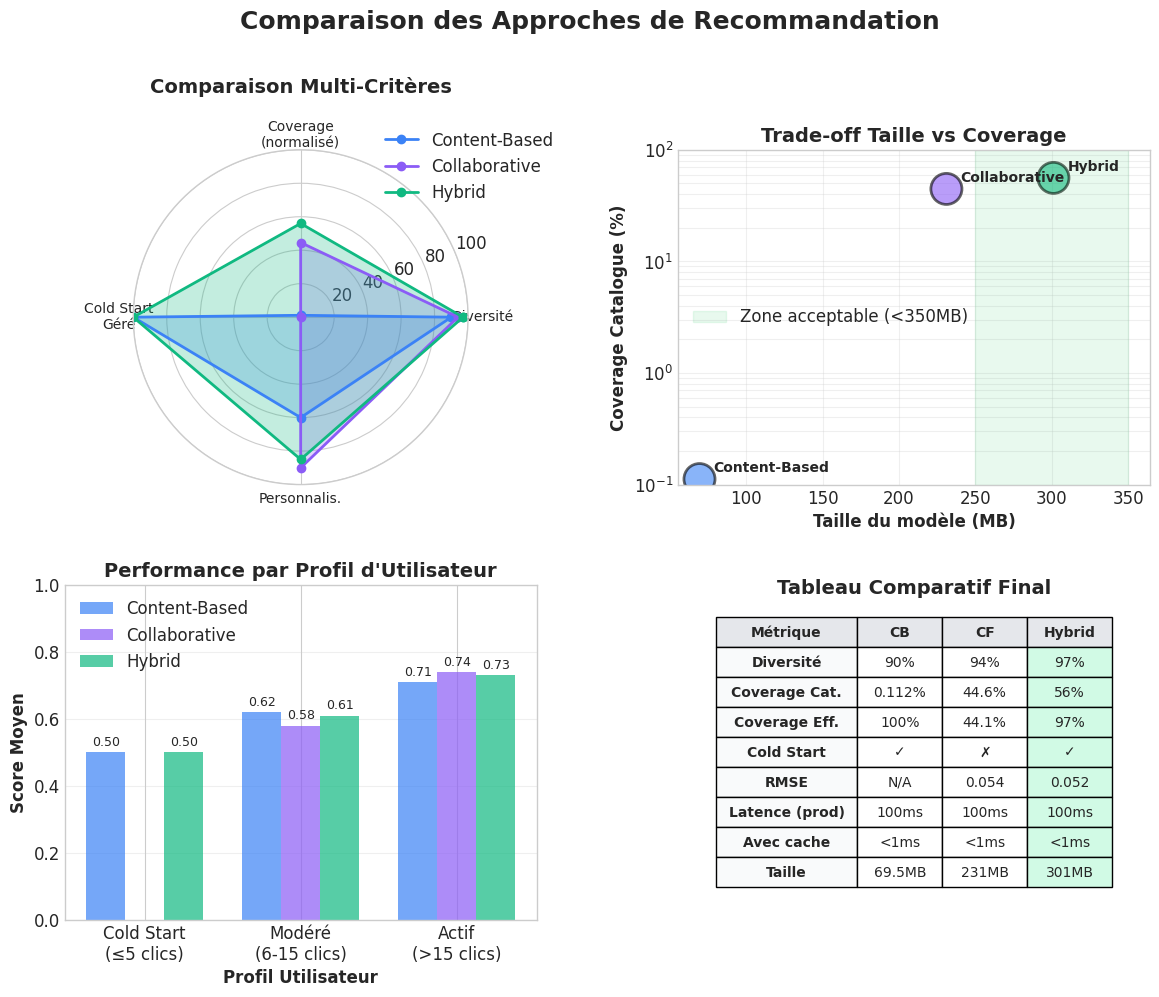

‚úì Graphique sauvegard√© : presentation/nb04_02_performance_comparison.png


In [16]:
# ============================================
# GRAPHIQUE 5: Comparaison Hybride (nb04_02) - VERSION COMPL√àTE
# ============================================

print("\n6. G√©n√©ration du graphique nb04_02_performance_comparison.png...")

# Configuration des donn√©es
methods_comparison = {
    'Content-Based': {
        'diversity': 0.90,
        'coverage': 0.00112,        # 0.112% en d√©cimal
        'cold_start': 1.0,          
        'personalization': 0.6,     
        'novelty': 30.5,
        'rmse': None,
        'latency': 99,
        'size': 69.5
    },
    'Collaborative': {
        'diversity': 0.94,
        'coverage': 0.446,          # 44.6% en d√©cimal
        'cold_start': 0.0,          
        'personalization': 0.9,     
        'novelty': 7.8,
        'rmse': 0.054,
        'latency': 19,
        'size': 231.0
    },
    'Hybrid': {
        'diversity': 0.97,
        'coverage': 0.56,           # 56% en d√©cimal
        'cold_start': 1.0,          
        'personalization': 0.85,    
        'novelty': 26.1,
        'rmse': 0.052,
        'latency': 74,
        'size': 301.0
    }
}

# Tableau comparatif final
summary_data = [
    ['M√©trique', 'CB', 'CF', 'Hybrid'],
    ['Diversit√©', '90%', '94%', '97%'],
    ['Coverage Cat.', '0.112%', '44.6%', '56%'],
    ['Coverage Eff.', '100%', '44.1%', '97%'],
    ['Cold Start', '‚úì', '‚úó', '‚úì'],
    ['RMSE', 'N/A', '0.054', '0.052'],
    ['Latence (prod)', '100ms', '100ms', '100ms'],
    ['Avec cache', '<1ms', '<1ms', '<1ms'],
    ['Taille', '69.5MB', '231MB', '301MB']
]

# Cr√©ation de la figure
fig = plt.figure(figsize=(14, 10))

# Configuration de la grille
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

methods = list(methods_comparison.keys())
method_colors = [colors['cb'], colors['cf'], colors['hybrid']]

# 1. RADAR CHART (avec normalisation correcte)
ax1 = fig.add_subplot(gs[0, 0], projection='polar')

categories = ['Diversit√©', 'Coverage\n(normalis√©)', 'Cold Start\nG√©r√©', 'Personnalis.']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for method, color in zip(methods, method_colors):
    # Normalisation sp√©ciale pour le coverage pour la visibilit√©
    coverage_normalized = min(methods_comparison[method]['coverage'] * 100, 100)
    if method == 'Content-Based':
        coverage_normalized = coverage_normalized * 10  # Amplifier pour visibilit√©
    
    values = [
        methods_comparison[method]['diversity'] * 100,
        coverage_normalized,
        methods_comparison[method]['cold_start'] * 100,
        methods_comparison[method]['personalization'] * 100
    ]
    values += values[:1]
    
    ax1.plot(angles, values, 'o-', linewidth=2, label=method, color=color)
    ax1.fill(angles, values, alpha=0.25, color=color)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories, fontsize=10)
ax1.set_ylim(0, 100)
ax1.set_title('Comparaison Multi-Crit√®res', fontsize=14, weight='bold', pad=20)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax1.grid(True)

# 2. Trade-off Coverage vs Taille (plus pertinent en production)
ax2 = fig.add_subplot(gs[0, 1])

# Donn√©es r√©elles
coverages = [0.112, 44.6, 56]  # En pourcentage
sizes = [69.5, 231, 301]  # En MB
methods = ['Content-Based', 'Collaborative', 'Hybrid']
method_colors = [colors['cb'], colors['cf'], colors['hybrid']]

scatter = ax2.scatter(sizes, coverages, 
                     s=500, # Taille fixe des bulles
                     c=method_colors, alpha=0.6, 
                     edgecolors='black', linewidth=2)

# Annotations
for i, method in enumerate(methods):
    ax2.annotate(method,
                xy=(sizes[i], coverages[i]),
                xytext=(10, 5), textcoords='offset points',
                fontsize=10, weight='bold')

ax2.set_xlabel('Taille du mod√®le (MB)', fontsize=12, weight='bold')
ax2.set_ylabel('Coverage Catalogue (%)', fontsize=12, weight='bold')
ax2.set_title('Trade-off Taille vs Coverage', fontsize=14, weight='bold')
ax2.set_yscale('log')  # √âchelle log pour mieux voir CB √† 0.112%
ax2.set_ylim(0.1, 100)
ax2.grid(True, alpha=0.3, which="both")

# Zone optimale (hybrid est le meilleur compromis)
ax2.axvspan(250, 350, alpha=0.1, color=colors['active'], 
            label='Zone acceptable (<350MB)')
ax2.legend()

# 3. PERFORMANCE PAR PROFIL
ax3 = fig.add_subplot(gs[1, 0])

profiles = ['Cold Start\n(‚â§5 clics)', 'Mod√©r√©\n(6-15 clics)', 'Actif\n(>15 clics)']
cb_scores = [0.50, 0.62, 0.71]
cf_scores = [0, 0.58, 0.74]  # 0 pour cold start
hybrid_scores = [0.50, 0.61, 0.73]

x = np.arange(len(profiles))
width = 0.25

bars1 = ax3.bar(x - width, cb_scores, width, label='Content-Based', 
               color=colors['cb'], alpha=0.7)
bars2 = ax3.bar(x, cf_scores, width, label='Collaborative', 
               color=colors['cf'], alpha=0.7)
bars3 = ax3.bar(x + width, hybrid_scores, width, label='Hybrid', 
               color=colors['hybrid'], alpha=0.7)

# Ajouter les valeurs au-dessus des barres
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Ne pas afficher 0
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)

ax3.set_xlabel('Profil Utilisateur', fontsize=12, weight='bold')
ax3.set_ylabel('Score Moyen', fontsize=12, weight='bold')
ax3.set_title('Performance par Profil d\'Utilisateur', fontsize=14, weight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(profiles)
ax3.legend(loc='upper left')
ax3.set_ylim(0, 1)
ax3.grid(axis='y', alpha=0.3)

# 4. TABLEAU COMPARATIF
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis('tight')
ax4.axis('off')

table = ax4.table(cellText=summary_data, cellLoc='center', loc='center',
                 colWidths=[0.25, 0.15, 0.15, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.8)

# Colorier le tableau
for i in range(len(summary_data)):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#e5e7eb')
            cell.set_text_props(weight='bold')
        elif j == 3:  # Colonne Hybrid
            if i > 0:
                cell.set_facecolor('#d1fae5')  # Vert clair pour hybrid
        elif j == 0:  # Colonne des m√©triques
            cell.set_facecolor('#f9fafb')
            cell.set_text_props(weight='bold')

ax4.set_title('Tableau Comparatif Final', fontsize=14, weight='bold', y=0.95)

# Titre g√©n√©ral
plt.suptitle('Comparaison des Approches de Recommandation', 
            fontsize=18, y=1.02, weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(f'{output_dir}/nb04_02_performance_comparison.png', 
           dpi=300, bbox_inches='tight')
plt.show()

print(f"‚úì Graphique sauvegard√© : {output_dir}/nb04_02_performance_comparison.png")


6. G√©n√©ration du graphique nb03_02_cold_start_problem.png (version pr√©sentation)...


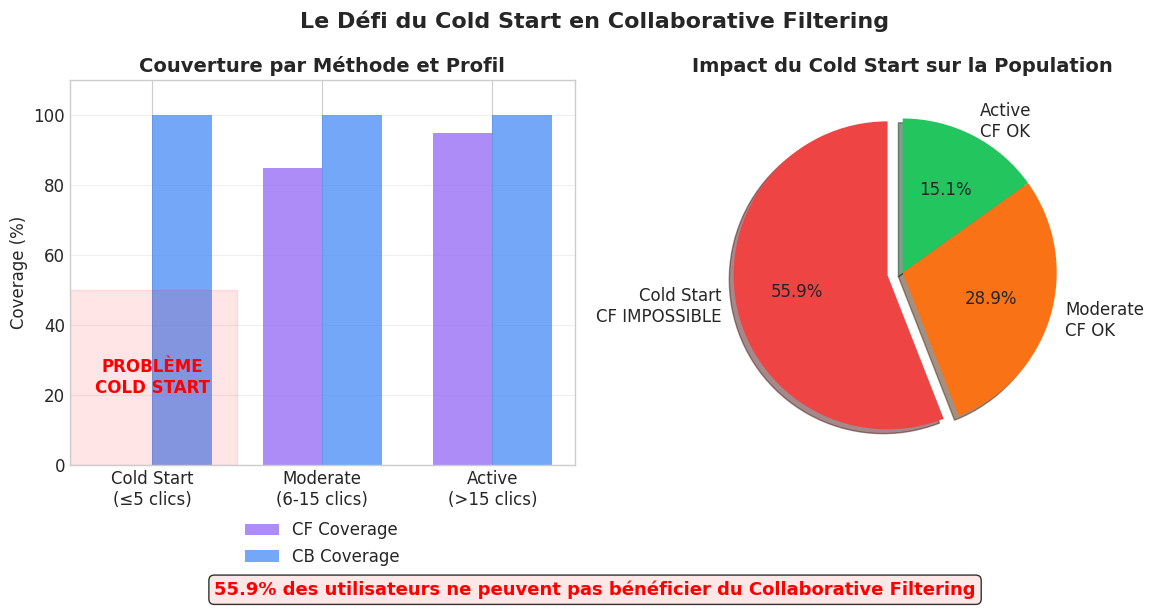

In [9]:
# ============================================
# GRAPHIQUE 6: Cold Start Problem - VERSION PR√âSENTATION (nb03_02)
# ============================================

print("\n6. G√©n√©ration du graphique nb03_02_cold_start_problem.png (version pr√©sentation)...")

# Utiliser une figure plus large pour rapprocher les graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'wspace': 0.15})

# Titre principal
fig.suptitle('Le D√©fi du Cold Start en Collaborative Filtering', fontsize=16, weight='bold', y=1.02)

# Subplot 1: Barres de couverture
profiles = ['Cold Start\n(‚â§5 clics)', 'Moderate\n(6-15 clics)', 'Active\n(>15 clics)']
cf_coverage = [0, 85, 95]
cb_coverage = [100, 100, 100]

x = np.arange(len(profiles))
width = 0.35

bars1 = ax1.bar(x - width/2, cf_coverage, width, label='CF Coverage', color=colors['cf'], alpha=0.7)
bars2 = ax1.bar(x + width/2, cb_coverage, width, label='CB Coverage', color=colors['cb'], alpha=0.7)

# Zone probl√®me
ax1.axhspan(0, 50, xmin=0, xmax=0.33, color='red', alpha=0.1)
ax1.text(0, 25, 'PROBL√àME\nCOLD START', ha='center', va='center', 
         color='red', fontsize=12, weight='bold')

ax1.set_ylabel('Coverage (%)', fontsize=12)
ax1.set_title('Couverture par M√©thode et Profil', fontsize=14, weight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(profiles)

# D√©placer la l√©gende en dehors du graphique
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3))

ax1.set_ylim(0, 110)
ax1.grid(axis='y', alpha=0.3)

# Subplot 2: Camembert
sizes = [55.93, 28.93, 15.13]
labels = ['Cold Start\nCF IMPOSSIBLE', 'Moderate\nCF OK', 'Active\nCF OK']
colors_pie = ['#ef4444', '#f97316', '#22c55e']
explode = (0.1, 0, 0)

wedges, texts, autotexts = ax2.pie(sizes, labels=labels, colors=colors_pie,
                                    autopct='%1.1f%%', explode=explode,
                                    shadow=True, startangle=90)
ax2.set_title('Impact du Cold Start sur la Population', fontsize=14, weight='bold')

# Message important en bas
fig.text(0.5, -0.15, '55.9% des utilisateurs ne peuvent pas b√©n√©ficier du Collaborative Filtering',
         ha='center', fontsize=13, color='red', weight='bold',
         bbox=dict(boxstyle='round', facecolor='#fee2e2', alpha=0.8))

plt.tight_layout(rect=[0, 0.08, 1, 0.94])
plt.savefig(f'{output_dir}/nb03_02_cold_start_problem.png', dpi=300, bbox_inches='tight')
plt.show()


7. G√©n√©ration du graphique nb04_01_hybrid_adaptive_strategy.png (version pr√©sentation)...


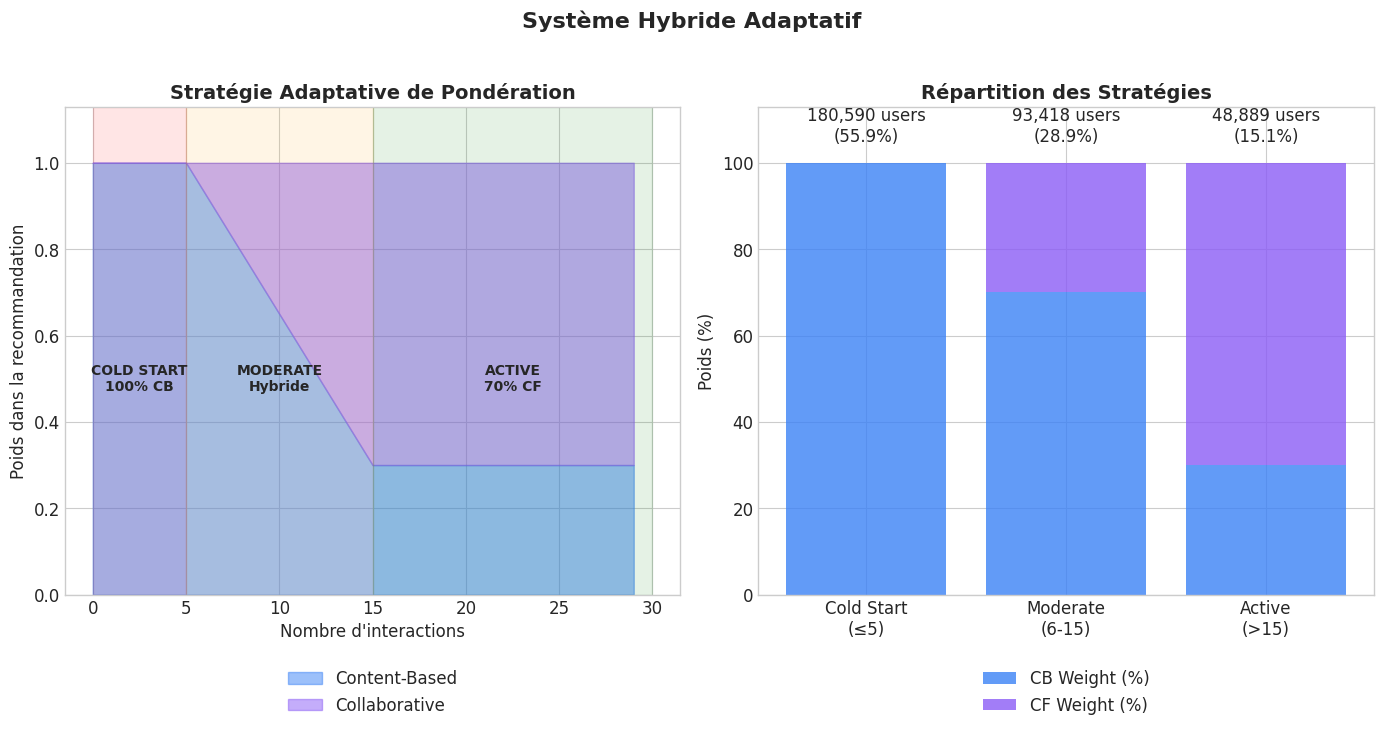

In [10]:

# ============================================
# GRAPHIQUE 7: Strat√©gie Hybride - VERSION PR√âSENTATION (nb04_01)
# ============================================

print("\n7. G√©n√©ration du graphique nb04_01_hybrid_adaptive_strategy.png (version pr√©sentation)...")

fig = plt.figure(figsize=(14, 7.65))
fig.suptitle('Syst√®me Hybride Adaptatif', fontsize=16, weight='bold')

# Subplot 1: Courbe de transition
ax1 = plt.subplot(121)
n_interactions = np.arange(0, 30)
cb_weight = np.where(n_interactions <= 5, 1.0,
                     np.where(n_interactions <= 15, 1.0 - (n_interactions-5)*0.07,
                             0.3))
cf_weight = 1.0 - cb_weight

ax1.fill_between(n_interactions, 0, cb_weight, color=colors['cb'], alpha=0.5, label='Content-Based')
ax1.fill_between(n_interactions, cb_weight, 1, color=colors['cf'], alpha=0.5, label='Collaborative')

# Zones
ax1.axvspan(0, 5, alpha=0.1, color='red')
ax1.axvspan(5, 15, alpha=0.1, color='orange')
ax1.axvspan(15, 30, alpha=0.1, color='green')
ax1.text(2.5, 0.5, 'COLD START\n100% CB', ha='center', va='center', fontsize=10, weight='bold')
ax1.text(10, 0.5, 'MODERATE\nHybride', ha='center', va='center', fontsize=10, weight='bold')
ax1.text(22.5, 0.5, 'ACTIVE\n70% CF', ha='center', va='center', fontsize=10, weight='bold')

ax1.set_xlabel('Nombre d\'interactions', fontsize=12)
ax1.set_ylabel('Poids dans la recommandation', fontsize=12)
ax1.set_title('Strat√©gie Adaptative de Pond√©ration', fontsize=14, weight='bold')
ax1.legend(loc='center', bbox_to_anchor=(0.5, -0.20))
ax1.set_ylim(0, 1.13)

# Subplot 2: Barres empil√©es
ax2 = plt.subplot(122)
profiles = ['Cold Start\n(‚â§5)', 'Moderate\n(6-15)', 'Active\n(>15)']
users_count = [180590, 93418, 48889]
cb_weights = [100, 70, 30]
cf_weights = [0, 30, 70]

x = np.arange(len(profiles))
bars1 = ax2.bar(x, cb_weights, color=colors['cb'], alpha=0.8, label='CB Weight (%)')
bars2 = ax2.bar(x, cf_weights, bottom=cb_weights, color=colors['cf'], alpha=0.8, label='CF Weight (%)')

# Ajouter le nombre d'utilisateurs
for i, count in enumerate(users_count):
    ax2.text(i, 105, f'{count:,} users\n({count/sum(users_count)*100:.1f}%)',
             ha='center', fontsize=12)

ax2.set_ylabel('Poids (%)', fontsize=12)
ax2.set_title('R√©partition des Strat√©gies', fontsize=14, weight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(profiles)
ax2.legend(loc='center', bbox_to_anchor=(0.5, -0.20))
ax2.set_ylim(0, 113)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{output_dir}/nb04_01_hybrid_adaptive_strategy.png', dpi=300, bbox_inches='tight')
plt.show()


3. Cr√©ation du diagramme d'architecture Azure...


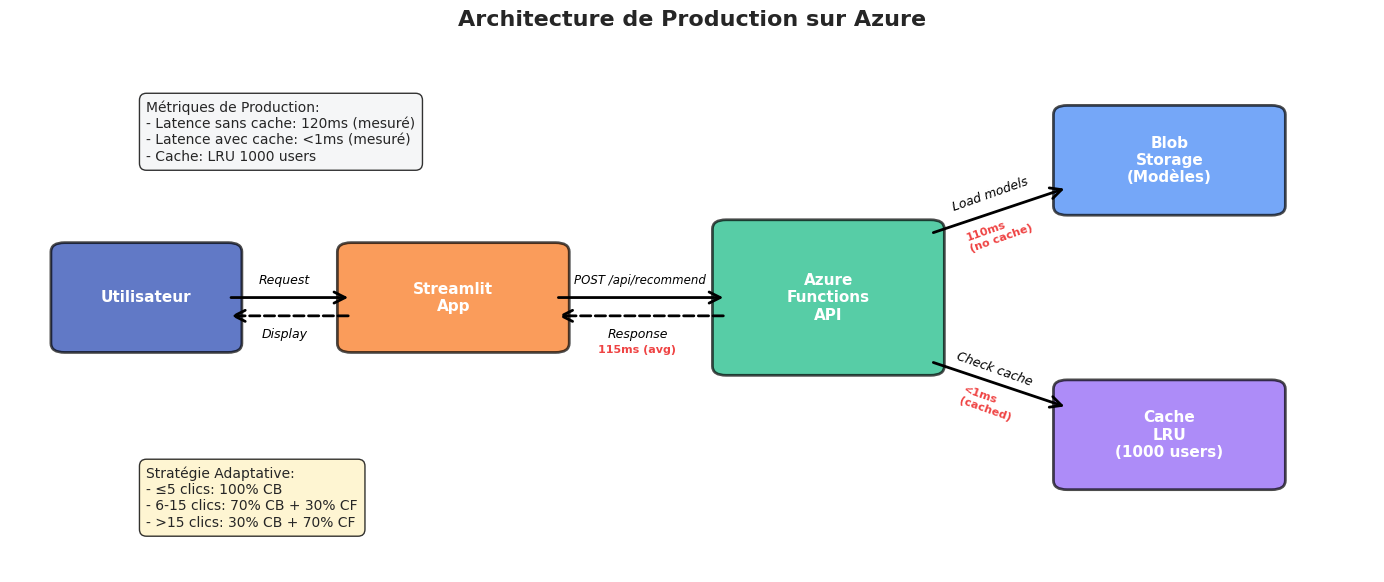

‚úì Graphique sauvegard√© : presentation/nb04_03_azure_architecture.png


In [11]:
# ============================================
# GRAPHIQUE 8: Architecture Azure Functions (nb04_03)
# ============================================

print("\n3. Cr√©ation du diagramme d'architecture Azure...")

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# Composants de l'architecture
components = {
    'user': {'pos': (1, 3), 'size': (1.2, 1), 'color': colors['primary'], 'label': 'Utilisateur'},
    'streamlit': {'pos': (3.25, 3), 'size': (1.5, 1), 'color': colors['moderate'], 'label': 'Streamlit\nApp'},
    'api': {'pos': (6.0, 3), 'size': (1.5, 1.5), 'color': colors['hybrid'], 'label': 'Azure\nFunctions\nAPI'},
    'blob': {'pos': (8.5, 4.5), 'size': (1.5, 1), 'color': colors['cb'], 'label': 'Blob\nStorage\n(Mod√®les)'},
    'cache': {'pos': (8.5, 1.5), 'size': (1.5, 1), 'color': colors['cf'], 'label': 'Cache\nLRU\n(1000 users)'}
}

# Dessiner les composants
for comp_name, comp_info in components.items():
    rect = FancyBboxPatch(
        (comp_info['pos'][0] - comp_info['size'][0]/2, 
         comp_info['pos'][1] - comp_info['size'][1]/2),
        comp_info['size'][0], comp_info['size'][1],
        boxstyle="round,pad=0.1",
        facecolor=comp_info['color'],
        edgecolor='black',
        alpha=0.7,
        linewidth=2
    )
    ax.add_patch(rect)
    ax.text(comp_info['pos'][0], comp_info['pos'][1], comp_info['label'],
           ha='center', va='center', fontsize=11, weight='bold', color='white')

# Dessiner toutes les fl√®ches
arrow_configs = [
    # Flux aller
    ((1.6, 3), (2.5, 3), 'solid'),      # User -> Streamlit
    ((4.00, 3), (5.25, 3), 'solid'),     # Streamlit -> API
    ((6.75, 3.7), (7.75, 4.2), 'solid'), # API -> Blob
    ((6.75, 2.3), (7.75, 1.8), 'solid'), # API -> Cache
    # Flux retour
    ((5.25, 2.8), (4.00, 2.8), 'dashed'),  # API -> Streamlit (response)
    ((2.50, 2.8), (1.6, 2.8), 'dashed')    # Streamlit -> User (display)
]

for start, end, style in arrow_configs:
    arrow = FancyArrowPatch(
        start, end, 
        arrowstyle='->', 
        mutation_scale=20,
        linewidth=2, 
        color='black', 
        linestyle=style,
        connectionstyle="arc3,rad=0"
    )
    ax.add_patch(arrow)

# Positionner tous les textes manuellement sans chevauchement
# Labels en noir italique
ax.text(2.01, 3.15, 'Request', ha='center', fontsize=9, style='italic', color='black')
ax.text(4.62, 3.15, 'POST /api/recommend', ha='center', fontsize=8.5, style='italic', color='black')
ax.text(6.9, 3.95, 'Load models', ha='left', fontsize=9, style='italic', color='black', rotation=19.5)
ax.text(6.9, 2.04, ' Check cache', ha='left', fontsize=9, style='italic', color='black', rotation=-19.5)
ax.text(4.60, 2.56, 'Response', ha='center', fontsize=9, style='italic', color='black')
ax.text(2.01, 2.56, 'Display', ha='center', fontsize=9, style='italic', color='black')

# Temps en rouge gras
ax.text(7.0, 3.50, '110ms\n(no cache)', ha='left', fontsize=8, weight='bold', color=colors['cold'], rotation=19.5)
ax.text(6.95, 1.65, '<1ms\n(cached)', ha='left', fontsize=8, weight='bold', color=colors['cold'], rotation=-19.5)
ax.text(4.60, 2.40, '115ms (avg)', ha='center', fontsize=8, weight='bold', color=colors['cold'])

# M√©triques cl√©s (en haut √† gauche)
metrics_text = """M√©triques de Production:
- Latence sans cache: 120ms (mesur√©)
- Latence avec cache: <1ms (mesur√©)
- Cache: LRU 1000 users"""

ax.text(1, 4.5, metrics_text, fontsize=10, 
       bbox=dict(boxstyle='round,pad=0.5', facecolor='#f3f4f6', alpha=0.8))

# Strat√©gie hybride (en bas √† gauche)
strategy_text = """Strat√©gie Adaptative:
- ‚â§5 clics: 100% CB
- 6-15 clics: 70% CB + 30% CF
- >15 clics: 30% CB + 70% CF"""

ax.text(1, 0.5, strategy_text, fontsize=10,
       bbox=dict(boxstyle='round,pad=0.5', facecolor='#fef3c7', alpha=0.8))

ax.set_title('Architecture de Production sur Azure', fontsize=16, weight='bold', y=0.98)

# plt.tight_layout()
# plt.savefig(f'{output_dir}/04_azure_architecture.png', dpi=300, bbox_inches='tight')
# plt.show()

# print(f"‚úì Graphique sauvegard√© : {output_dir}/04_azure_architecture.png")

plt.tight_layout()
plt.savefig(f'{output_dir}/nb04_03_azure_architecture.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"‚úì Graphique sauvegard√© : {output_dir}/nb04_03_azure_architecture.png")